In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def my_numpy_matrix(n):

    h = 1/n

    a = -2 * np.ones(n-1)
    b = np.ones(n-2)

    A = np.diag(b, -1) + np.diag(a, 0) + np.diag(b, 1)

    return A/h**2

# ---------------------------------------------------------------- #

n = 4
A = my_numpy_matrix(n)

#print(A)

In [3]:
# returns structured array of eigen value & vector pairs sorted by value
def sorted_eigen_pairs(A):

    [values, vectors] = np.linalg.eig(A)

    n = len(values)

    pairs = np.zeros(n, dtype = [('eigen_value', 'f8'),
                                 ('eigen_vector', 'f8', (n))])

    pairs['eigen_value'] = values
    pairs['eigen_vector'] = vectors

    indices = np.argsort(pairs, order = ['eigen_value'])
    indices = np.flip(indices)

    return pairs[indices]

# ---------------------------------------------------------------- #

n = 4
A = my_numpy_matrix(n)
pairs = sorted_eigen_pairs(A)

#print(pairs)

In [69]:
def show_eigen_info(n_min, n_max, j_max):

    print("----------------------------------------------------------------", "\n")

    for n in range(n_min, n_max+1):
        print("n =", n)
        print("-----")
    #    print("h =", 1/n)
    #    print("")

        A = my_numpy_matrix(n)

        """
        print("Matrix:")
        print(A)
        print("")
        """

        pairs = sorted_eigen_pairs(A)

        values  = []
        vectors = []
        for i in range(n-1):
            values  += [pairs[i][0]]
            vectors += [pairs[i][1]]

        """
        print("Eigenpairs:")
        for j, pair in enumerate(pairs):
            if j <= j_max:
                print(pair)
        print("")
        """

    #    """
    #    print("Eigenvalues:")
        for j, value in enumerate(values):
            if j <= j_max:
                print(value)
        print("")
    #    """

        """
        print("Eigenvectors:")
        for j, vector in enumerate(vectors):
            if j <= j_max:
                print(vector)
        print("")
        """

    #    print("----------------------------------------------------------------", "\n")

# ---------------------------------------------------------------- #

n_min = 2
n_max = 10
j_max = n_max

#show_eigen_info(n_min, n_max, j_max)

In [5]:
def show_eigen_limits(j_max):
    for j in range(1, j_max+1):
        print("-({} * pi)^2 =".format(j), -(j * np.pi)**2)

# ---------------------------------------------------------------- #

j_max = 9

#show_eigen_limits(j_max)

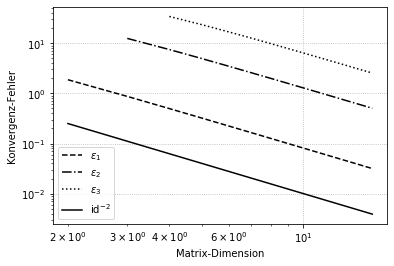

In [6]:
# n_max .......... maximum matrix type
# eigen_amount ... maximum amount of eigen values to track

# ---------------------------------------------------------------- #

# plots convergence error of eigen values
def plot_1(n_max, eigen_amount, lines):

    # there are n_max-1 eigen values/vectors at max
    assert eigen_amount < n_max

    # where eigen values should converge to
    eigen_limits = -(np.array(range(1, eigen_amount+1)) * np.pi)**2

    # matrix types
    x = np.array(range(2, n_max+1))

    # upper triangular matrix of eigen values times eigen value instances
    y = np.zeros((eigen_amount, len(x)))

    # iterate over eigen value instances
    for i in range(y.shape[1]):
        A     = my_numpy_matrix(x[i])
        pairs = sorted_eigen_pairs(A)

        eigen_values  = []
        eigen_vectors = []
        for j in range(x[i]-1):
            eigen_values  += [pairs[j][0]]
            eigen_vectors += [pairs[j][1]]

        # iterate over eigen values in instance
        for j in range(np.minimum(x[i]-1, eigen_amount)):
            y[j][i] = abs(eigen_limits[j] - eigen_values[j])

    fig, ax = plt.subplots()

    # do actual plotting
    for j, line in zip(range(eigen_amount), lines):
        plt.loglog(x[j::], y[j][j::], line, color = 'black')

    # add reference
    plt.loglog(x, 1/x**2, color = 'black')

    # add legend
    legend = []
    legend += ["$\epsilon_{}$".format(j) for j in range(1, eigen_amount+1)]
    legend += ["id$^{{-2}}$"]

    plt.legend((*legend,))
    ax.set_xlabel("Matrix-Dimension")
    ax.set_ylabel("Konvergenz-Fehler")

    plt.grid(linestyle = ':')
    plt.show()

# ---------------------------------------------------------------- #

n_max        = 16
eigen_amount = 3

lines = ['--', '-.', ':']

plot_1(n_max, eigen_amount, lines)

In [33]:
# under construction:

# eigen_number ... which eigen vector to track

# plots eigen vector iterations
def plot_2(n_max, eigen_number):

    # there are n_max-1 eigen values/vectors at max
    assert eigen_number < n_max

    plt.figure(figsize = (15, 5))

    # iterate over eigen vector instances
    for n in range(n_max, n_max+1):
        A     = my_numpy_matrix(n)
        pairs = sorted_eigen_pairs(A)

        eigen_values  = []
        eigen_vectors = []
        for i in range(n-1):
            eigen_values  += [pairs[i][0]]
            eigen_vectors += [pairs[i][1]]

        x = np.linspace(0, 1, n+1)
        y = np.concatenate(([0], eigen_vectors[eigen_number-1], [0]))

        print("x =", x)
        print("y =", y)

        plt.plot(x, y, 'o-')
        kappa = np.pi * eigen_number
        C_1 = 0
        C_2 = 1
        plt.plot(x, C_1*np.cos(kappa * x) + C_2*np.sin(kappa * x))

    plt.grid(linestyle = ':')
    plt.show()

# ---------------------------------------------------------------- #

n_max = 100
eigen_number = 1

#plot_2(n_max, eigen_number)

In [47]:
# calculate determinants of my_numpy_matrix and its variation

def my_determinant_1(n):

    A = my_numpy_matrix(n)

    det = np.linalg.det(A)

    return det

def my_determinant_2(n):

    A = my_numpy_matrix(n)
    A_prime = A/n**2

    det = np.linalg.det(A_prime)

    return det

def calculate_determinants(n_max):

    for n in range(2, n_max):
        det = my_determinant_1(n)
        det = round(det, 4)
        print("det(A_{}) =".format(n), det)

    print("")

    for n in range(2, n_max):
        det = my_determinant_2(n)
        det = round(det, 8)
        print("det(A'_{}) =".format(n), det)

# ---------------------------------------------------------------- #

n_max = 10

#calculate_determinants(n_max)

In [9]:
def my_sympy_matrix(n):

    h = 1/n

    def fill(i, j):

        if i == j:
            return -2
        elif i == j-1 or i-1 == j:
            return 1
        else:
            return 0

    A = sp.Matrix(n-1, n-1, fill)

    return A

def calculate_jordan_matrices(n_max):

    print("----------------------------------------------------------------", "\n")

    for n in range(2, n_max):
        A = my_sympy_matrix(n)
        print("A_{} =".format(n))
        display(A)

        (P, J) = A.jordan_form()
        print("Jordan normal form of A_{} =".format(n))
        display(J)

        print("----------------------------------------------------------------", "\n")

# ---------------------------------------------------------------- #

n_max = 4

#calculate_jordan_matrices(n_max)

In [32]:
def calculate_random_shait():

    kappa = sp.IndexedBase('\kappa')

    R = sp.Matrix([[ sp.sin(kappa[0]/2),  kappa[0]*sp.cos(kappa[0]/2), 0               ],
                   [-sp.cos(kappa[1]/2),  kappa[1]*sp.sin(kappa[1]/2), sp.cos(kappa[1])],
                   [-sp.sin(kappa[1]/2), -kappa[1]*sp.cos(kappa[1]/2), sp.sin(kappa[1])]])
    R = R.T

    display(R)

    det = sp.det(R)
    display(det)
    print(sp.latex(det))

    det = sp.simplify(det)
    display(det)
    print(sp.latex(det))

# ---------------------------------------------------------------- #

#calculate_random_shait()

In [11]:
# c ... pair of propagation speeds

def get_zero_function(c):

    # allocate some sympy symbols:
    omega = sp.Symbol('\omega')
    kappa = sp.IndexedBase('\kappa')

    # implement the matrix R (properly):
    R = sp.Matrix([[ sp.sin(kappa[0]/2),  kappa[0]*sp.cos(kappa[0]/2), 0               ],
                   [-sp.cos(kappa[1]/2),  kappa[1]*sp.sin(kappa[1]/2), sp.cos(kappa[1])],
                   [-sp.sin(kappa[1]/2), -kappa[1]*sp.cos(kappa[1]/2), sp.sin(kappa[1])]])
    R = R.T

    # calculate R's determinant (properly):
    det = sp.det(R)
    det = sp.simplify(det)

    # substitute for kappa_0 and kappa_1:
    kappa_0 = omega/c[0]
    kappa_1 = omega/c[1]
    det = det.subs({kappa[0]: kappa_0, kappa[1]: kappa_1})

    # transform expression det into proper numpy function:
    zero_function = sp.lambdify(omega, det, 'numpy')

    return zero_function

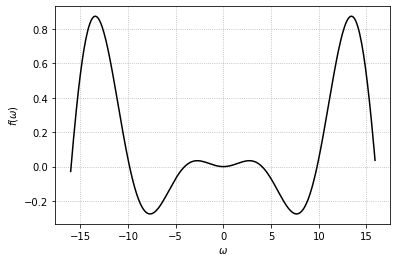

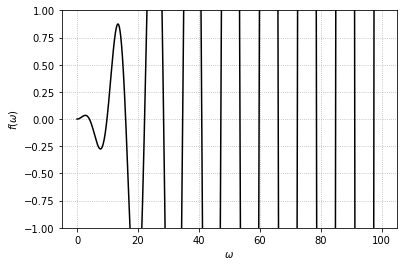

In [20]:
# interval ... where to plot
# limits ..... pair of boundaries for y-axis

def plot_omegas(zero_function, interval, **kwargs):

    f = zero_function
    a = interval[0]
    b = interval[1]
    dt = 0.1

    x = np.arange(a, b, dt)
    y = f(x)

    fig, ax = plt.subplots()

    ax.set_xlabel("$\omega$")
    ax.set_ylabel("$f(\omega)$")

    if 'limits' in kwargs.keys():
        plt.ylim(*kwargs['limits'])

    plt.plot(x, y, color = 'black')
    plt.grid(linestyle = ":")
    plt.show()

# ---------------------------------------------------------------- #

c = (100, 1)
zero_function = get_zero_function(c)

interval = (-16, 16)

plot_omegas(zero_function, interval)

limit = 1

interval = (0, 100)
limits   = (-limit, limit)

plot_omegas(zero_function, interval, limits = limits)

In [13]:
from scipy.optimize import fsolve

# guesses ... array of guesses for omega to start iteration

def find_omegas(zero_function, guesses, tol):

    f = zero_function

    for guess in guesses:
        solutions = fsolve(f, guess, xtol = tol)
        print("solutions when guessing \omega = {}:".format(guess))
        print(solutions)
        print("squared:")
        print(solutions**2)
        print("")

# ---------------------------------------------------------------- #

c = (100, 1)
zero_function = get_zero_function(c)

guesses = [0, 5, 10, 15]
tol     = 1e-8

find_omegas(zero_function, guesses, tol)

solutions when guessing \omega = 0:
[0.]
squared:
[0.]

solutions when guessing \omega = 5:
[4.05742465]
squared:
[16.46269482]

solutions when guessing \omega = 10:
[9.82605835]
squared:
[96.55142264]

solutions when guessing \omega = 15:
[15.9568155]
squared:
[254.61996082]



In [31]:
def my_other_matrix(n, c):

    lower_times = np.floor((n-1)/2)
    lower_times = int(lower_times)
    upper_times = np.ceil((n-1)/2)
    upper_times = int(upper_times)

    lower = [c[0]]*lower_times
    upper = [c[1]]*upper_times

    B_inv = np.diag(lower + upper)

    return B_inv

# ---------------------------------------------------------------- #

n = 4
c = (100, 1)
B_inv = my_other_matrix(n, c)

#print(B_inv)

In [65]:
def show_generalized_eigen_info(n_min, n_max, j_max, c):

    assert 2 <= n_min <= n_max
    assert c[0] != 0 and c[1] != 0

    print("----------------------------------------------------------------", "\n")

    for n in range(n_min, n_max+1):
        print("n =", n)
        print("-----")
#        print("h =", 1/n)
#        print("")

        A = my_numpy_matrix(n)
        B = my_other_matrix(n, c)
        B_inv_A = B@A

        """
        print("Matrix:")
        print(A)
        print("")
        """

        pairs = sorted_eigen_pairs(B_inv_A)

        values  = []
        vectors = []
        for i in range(n-1):
            values  += [pairs[i][0]]
            vectors += [pairs[i][1]]

        """
        print("Eigenpairs:")
        for j, pair in enumerate(pairs):
            if j <= j_max:
                print(pair)
        print("")
        """

#        """
        print("Eigenvalues:")
        for j, value in enumerate(values):
            if j <= j_max:
                print(value)
        print("")
#        """

        """
        print("Eigenvectors:")
        for j, vector in enumerate(vectors):
            if j <= j_max:
                print(vector)
        print("")
        """

#        print("----------------------------------------------------------------", "\n")

# ---------------------------------------------------------------- #

n_min = 1000
n_max = 1000
j_max = 2
c = (100, 1)

show_generalized_eigen_info(n_min, n_max, j_max, c)

---------------------------------------------------------------- 

n = 1000
-----
Eigenvalues:
-16.36765487049704
-95.77791479172302
-252.4289978568357

